# Model Selection 

The objective of this notebook is to build a very first ent to end Machine Learning model to predict the probability of a patient being discharged on a particular day.

We'll use the dataset generated by the `dataset` job of the ETL folder. 

At this instance, the focus won't be on model performance but rather on understanding the value potential of the available data and the speedness of the solution.

In [1]:
%cd /Users/josefinadallavia/Documents/MIM/Tesis/AML-hospital

/Users/josefinadallavia/Documents/MIM/Tesis/AML-hospital


In [2]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
from matplotlib import pyplot as plt   
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from thesis_lib.utils import * 
from thesis_lib.modelling.data import *
from thesis_lib.modelling.model import *


/Users/josefinadallavia/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/josefinadallavia/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/josefinadallavia/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
data = Data().load('data/hospital_dataset')
variables = data.get_variables_dict()
data.get_stats()

Loading dataset:  hospital_train_data.parquet
Loading dataset:  hospital_val_data.parquet
Loading dataset:  hospital_test_data.parquet


dataset_type         train         val        test
n_observations      319150       33482       33309
relative_size      0.82694   0.0867542   0.0863059
n_cols                  71          71          71
positives            42697        4555        4507
negatives           276453       28927       28802
positive_prop     0.133783    0.136043    0.135309
negative_prop     0.866217    0.863957    0.864691
min_date        2017-01-01  2018-11-11  2018-11-11
max_date        2018-11-10  2019-11-11  2019-11-11

In [4]:
sequence_features = ['labos_studies_names','sectors_names','images_study_types','surgeries_types',
                    'surgeries_injury_condition','surgeries_post_surgery_condition','surgeries_anesthesia_types']

In [5]:
text_features = ['administrative_diagnosis','presumptive_dianogsis','images_studies_names',
                'surgeries_actual']

In [6]:
text_features = [ 'administrative_diagnosis','presumptive_dianogsis','images_studies_names',
                'surgeries_actual' ,            
    'labos_studies_names','sectors_names','images_study_types','surgeries_types',
                    'surgeries_injury_condition','surgeries_post_surgery_condition','surgeries_anesthesia_types']

In [7]:
categorical_features = ['date_weekday',
 'request_origin',
 'origin',
 'entity_group',
 'gender',
 'request_sector',
 'insurance_entity',
 'admission_sector',
 'emergency_service',
 'isolation',
 'ARM_TEP',
 'CEC_TEP',
 'request_sector',
 'date_weekday',
 'admission_weekday',
 'date_month',
 'admission_month']

In [8]:
numerical_features = ['PIM2TEP',
 'emergency_service',
 'high_risk_TEP',
 'hosp_day_number',
 'images_count',
 'images_cumulative',
 'images_emergencies',
 'images_requester_roles_count',
 'images_requesters_count',
 'images_study_types_count',
 'labos_count',
 'labos_cumulative',
 'labos_emergencies',
 'labos_requester_roles_count',
 'labos_requesters_count',
 'labos_set_count',
 'labos_set_cumulative',
 'low_risk_TEP',
 'new_born_gestation_age',
 'new_born_weight',
 'patient_age',
 'sectors_count',
 'sectors_last_stay',
 'surgeries_count',
 'surgeries_cumulative',
 'surgeries_post_surgery_duration',
 'surgeries_pre_surgery_duration',
 'surgeries_prep_duration',
 'surgeries_services_count',
 'surgeries_surgery_delay',
 'surgeries_surgery_duration',
 'surgeries_types_count']

### All features

In [9]:
model_params = {'classifier': 'random_forest',
               'accepts_sparse': True,
                'categorical_features' : categorical_features ,
                'numerical_features' : numerical_features,
               'text_features': text_features,
                #'sequence_features':sequence_features
               }

In [ ]:
rf_comb_features = Model(**model_params)
rf_comb_features.transform(data)

Fitting pipeline...
	 Preprocessing data
	 Preprocessing data
	 Encoding Categorical Features with OneHotEncoding
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data


In [ ]:
rf_comb_features.n_features

In [ ]:
%%time
rf_comb_features.fit_classifier()

In [ ]:
rf_comb_features.get_performance_metrics()

### Fine tuning

In [18]:
rf_param_grid = {'max_depth': [3,7,10,15,30],
                  'bagging_fraction': [0.5,0.7,0.8,0.9],
                  'num_iterations': [50,100,150,200,300]}

In [19]:
rf_comb_features.optimize_hyperparams(params_dict=rf_param_grid,
                                         n_folds=3,
                                         search_type='grid')

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:   15.4s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:   34.4s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:  1.8min
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:  2.8min
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:  3.6min
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  5.7min
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  8.8min
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 10.2min
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed: 15.2min
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed: 19.5min
[Parallel(n_jobs=2)]: Done  72 out of  72 | elapsed: 21.0min finished


{'mean_fit_time': array([ 12.05694   ,  17.3668201 ,  25.9547476 ,  38.18082523,
          6.47798347,  10.11173089,  13.30887214,  21.01772014,
         36.47030393,  32.30552999,  41.16321158,  58.72190452,
          8.50639685,  12.30180438,  16.30642907,  24.29858088,
         31.77164586,  49.10095445,  84.37962087, 120.42489497,
         13.35944565,  19.65349865,  26.82765206,  38.1464467 ]),
 'std_fit_time': array([ 0.1619514 ,  0.48946196,  0.97584302,  1.70714942,  0.4723888 ,
         0.55916367,  0.49809144,  2.98993784,  8.65041565,  0.76971357,
         1.58856505,  6.02872951,  0.21011873,  0.31695812,  0.38980941,
         0.93084021,  0.7762075 ,  0.69558832,  9.43258617, 12.76418583,
         0.41023393,  0.3517064 ,  1.74040203,  4.71256633]),
 'mean_score_time': array([1.40265505, 2.03211927, 3.56236808, 4.14036814, 1.3442897 ,
        2.13471897, 2.64608439, 4.61589424, 2.74890407, 2.39242061,
        3.62572447, 4.30525231, 1.41910895, 2.02959593, 2.72042632,
    

In [20]:
exp_results = rf_comb_features.get_model_selection_results()

In [21]:
exp_results.to_csv('experiments/combined/rf_comb_features_grid_search_results.csv')

In [22]:
best_params = rf_comb_features.model_selection.best_params_
best_params

{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 300}

### Optimized

In [30]:
rf_comb_features.fit_best_classifier()

Training classifier


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 300
building tree 2 of 300


[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.6s


building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300


[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    1.2s


building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300


[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    2.6s


building tree 13 of 300building tree 14 of 300

building tree 15 of 300
building tree 16 of 300
building tree 17 of 300


[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    3.9s


building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300


[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    5.6s


building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300


[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    8.0s


building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300


[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:   10.2s


building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300
building tree 46 of 300
building tree 47 of 300
building tree 48 of 300


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   12.3s


building tree 49 of 300
building tree 50 of 300
building tree 51 of 300
building tree 52 of 300
building tree 53 of 300
building tree 54 of 300
building tree 55 of 300
building tree 56 of 300
building tree 57 of 300
building tree 58 of 300


[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:   15.6s


building tree 59 of 300
building tree 60 of 300
building tree 61 of 300
building tree 62 of 300
building tree 63 of 300
building tree 64 of 300
building tree 65 of 300
building tree 66 of 300
building tree 67 of 300
building tree 68 of 300
building tree 69 of 300
building tree 70 of 300


[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:   18.3s


building tree 71 of 300
building tree 72 of 300
building tree 73 of 300
building tree 74 of 300
building tree 75 of 300
building tree 76 of 300
building tree 77 of 300
building tree 78 of 300
building tree 79 of 300
building tree 80 of 300
building tree 81 of 300
building tree 82 of 300
building tree 83 of 300


[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:   21.8s


building tree 84 of 300
building tree 85 of 300
building tree 86 of 300
building tree 87 of 300
building tree 88 of 300
building tree 89 of 300
building tree 90 of 300
building tree 91 of 300
building tree 92 of 300
building tree 93 of 300
building tree 94 of 300
building tree 95 of 300
building tree 96 of 300


[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:   25.9s


building tree 97 of 300
building tree 98 of 300
building tree 99 of 300
building tree 100 of 300
building tree 101 of 300
building tree 102 of 300
building tree 103 of 300
building tree 104 of 300
building tree 105 of 300
building tree 106 of 300
building tree 107 of 300
building tree 108 of 300
building tree 109 of 300
building tree 110 of 300
building tree 111 of 300


[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:   29.7s


building tree 112 of 300
building tree 113 of 300
building tree 114 of 300
building tree 115 of 300
building tree 116 of 300
building tree 117 of 300
building tree 118 of 300
building tree 119 of 300
building tree 120 of 300
building tree 121 of 300
building tree 122 of 300
building tree 123 of 300
building tree 124 of 300
building tree 125 of 300
building tree 126 of 300


[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:   34.0s


building tree 127 of 300
building tree 128 of 300
building tree 129 of 300
building tree 130 of 300
building tree 131 of 300
building tree 132 of 300
building tree 133 of 300
building tree 134 of 300
building tree 135 of 300
building tree 136 of 300
building tree 137 of 300
building tree 138 of 300
building tree 139 of 300
building tree 140 of 300
building tree 141 of 300
building tree 142 of 300
building tree 143 of 300
building tree 144 of 300


[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:   38.9s


building tree 145 of 300
building tree 146 of 300
building tree 147 of 300
building tree 148 of 300
building tree 149 of 300
building tree 150 of 300
building tree 151 of 300
building tree 152 of 300
building tree 153 of 300
building tree 154 of 300
building tree 155 of 300
building tree 156 of 300
building tree 157 of 300
building tree 158 of 300
building tree 159 of 300
building tree 160 of 300
building tree 161 of 300


[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:   43.8s


building tree 162 of 300
building tree 163 of 300
building tree 164 of 300
building tree 165 of 300
building tree 166 of 300
building tree 167 of 300
building tree 168 of 300
building tree 169 of 300
building tree 170 of 300
building tree 171 of 300
building tree 172 of 300
building tree 173 of 300
building tree 174 of 300
building tree 175 of 300
building tree 176 of 300
building tree 177 of 300
building tree 178 of 300
building tree 179 of 300


[Parallel(n_jobs=2)]: Done 177 tasks      | elapsed:   48.4s


building tree 180 of 300
building tree 181 of 300
building tree 182 of 300
building tree 183 of 300
building tree 184 of 300
building tree 185 of 300
building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300
building tree 197 of 300
building tree 198 of 300


[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   53.8s


building tree 199 of 300
building tree 200 of 300
building tree 201 of 300
building tree 202 of 300
building tree 203 of 300
building tree 204 of 300
building tree 205 of 300
building tree 206 of 300
building tree 207 of 300
building tree 208 of 300
building tree 209 of 300
building tree 210 of 300
building tree 211 of 300
building tree 212 of 300
building tree 213 of 300
building tree 214 of 300
building tree 215 of 300
building tree 216 of 300
building tree 217 of 300
building tree 218 of 300
building tree 219 of 300
building tree 220 of 300


[Parallel(n_jobs=2)]: Done 217 tasks      | elapsed:   59.3s


building tree 221 of 300
building tree 222 of 300
building tree 223 of 300
building tree 224 of 300
building tree 225 of 300
building tree 226 of 300
building tree 227 of 300
building tree 228 of 300
building tree 229 of 300
building tree 230 of 300
building tree 231 of 300
building tree 232 of 300
building tree 233 of 300
building tree 234 of 300
building tree 235 of 300
building tree 236 of 300
building tree 237 of 300
building tree 238 of 300
building tree 239 of 300
building tree 240 of 300


[Parallel(n_jobs=2)]: Done 238 tasks      | elapsed:  1.1min


building tree 241 of 300
building tree 242 of 300
building tree 243 of 300
building tree 244 of 300
building tree 245 of 300
building tree 246 of 300
building tree 247 of 300
building tree 248 of 300
building tree 249 of 300
building tree 250 of 300
building tree 251 of 300
building tree 252 of 300
building tree 253 of 300
building tree 254 of 300
building tree 255 of 300
building tree 256 of 300
building tree 257 of 300
building tree 258 of 300
building tree 259 of 300
building tree 260 of 300
building tree 261 of 300
building tree 262 of 300
building tree 263 of 300


[Parallel(n_jobs=2)]: Done 261 tasks      | elapsed:  1.2min


building tree 264 of 300
building tree 265 of 300
building tree 266 of 300
building tree 267 of 300
building tree 268 of 300
building tree 269 of 300
building tree 270 of 300
building tree 271 of 300
building tree 272 of 300
building tree 273 of 300
building tree 274 of 300
building tree 275 of 300
building tree 276 of 300
building tree 277 of 300
building tree 278 of 300
building tree 279 of 300
building tree 280 of 300
building tree 281 of 300
building tree 282 of 300
building tree 283 of 300
building tree 284 of 300
building tree 285 of 300
building tree 286 of 300
building tree 287 of 300


[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:  1.3min


building tree 288 of 300
building tree 289 of 300
building tree 290 of 300
building tree 291 of 300
building tree 292 of 300
building tree 293 of 300
building tree 294 of 300
building tree 295 of 300
building tree 296 of 300
building tree 297 of 300
building tree 298 of 300
building tree 299 of 300
building tree 300 of 300


[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:  1.4min finished


In [31]:
rf_comb_features.get_performance_metrics()

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    1.4s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    2.5s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    3.0s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:    3.7s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    4.4s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:    5.6s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:    6.6s
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:    7.5s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    8.0s
[Parallel(n_jobs=2)]: Done 141 tasks      | elapsed:    8.6s
[Para

training AUC ROC score:  0.8262823876457137
validation AUC ROC score:  0.8027932571247423
relative over-fitting:  0.028427485411976282


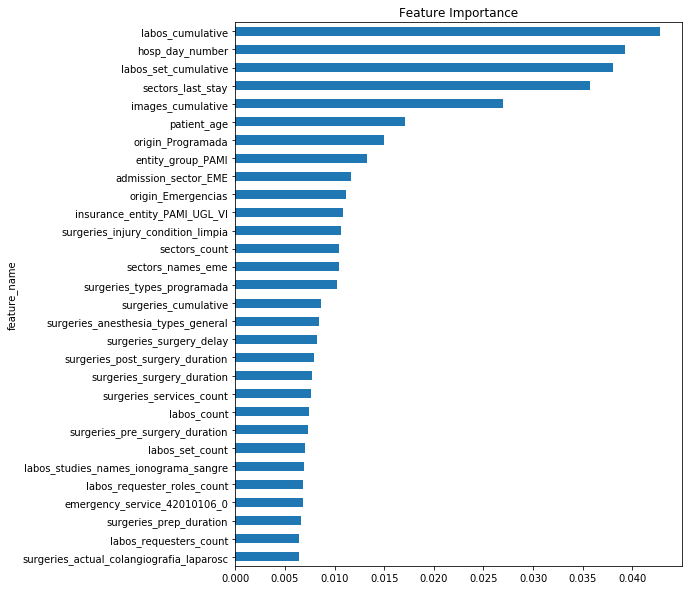

In [32]:
rf_comb_features.plot_feature_importance()

In [33]:
import pickle
outputfile ='experiments/combined/rf_comb_features_optimized.pkl'
with open(outputfile, 'wb') as pickle_file:
    pickle.dump(rf_comb_features, pickle_file)

In [40]:
estimator = rf_comb_features.classifier.estimators_[-1]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='/Users/josefinadallavia/Documents/MIM/Tesis/AML-hospital/experiments/tree.dot', 
                feature_names = [name[:10] for name in rf_comb_features.model_features],
                class_names = ['False','True'],
                rounded = False, proportion = False, 
                precision = 2, filled = True,impurity=False,
               rotate=False)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', '/Users/josefinadallavia/Documents/MIM/Tesis/AML-hospital/experiments/tree.dot', '-o', 
      '/Users/josefinadallavia/Documents/MIM/Tesis/AML-hospital/experiments/tree.png', '-Gdpi=600'])


0

In [33]:
!pwd

/Users/josefinadallavia/Documents/MIM/Tesis/AML-hospital


In [41]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = '/Users/josefinadallavia/Documents/MIM/Tesis/AML-hospital/experiments/tree.png',width=4000,height=4000)